# Machine Learning Project

## Patient Survival Prediction

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import joblib



# Upload dataset file

In [ ]:
hospital_data = pd.read_csv('dataset.csv')

# Read the data

In [ ]:
X = hospital_data.drop(columns=['hospital_death'])
y = hospital_data['hospital_death']

# Preparing the dataset

##      - Handling empty cells if any

####       - Check if contains null or missing values

In [ ]:
hospital_data.isnull().any()

age                  False
bmi                  False
elective_surgery     False
gender               False
height               False
weight               False
d1_diasbp_max        False
d1_diasbp_min        False
d1_heartrate_max     False
d1_heartrate_min     False
d1_mbp_max           False
d1_mbp_min           False
d1_resprate_max      False
d1_resprate_min      False
d1_temp_max          False
d1_temp_min          False
h1_heartrate_max     False
h1_heartrate_min     False
h1_mbp_max           False
h1_mbp_min           False
h1_resprate_max      False
h1_resprate_min      False
d1_glucose_max       False
d1_glucose_min       False
d1_potassium_max     False
d1_potassiu1_min     False
aids                 False
cirrhosis            False
diabetes_mellitus    False
hospital_death       False
dtype: bool

#### - Display sum of null or missing values


In [ ]:
hospital_data.isnull().sum()

age                  0
bmi                  0
elective_surgery     0
gender               0
height               0
weight               0
d1_diasbp_max        0
d1_diasbp_min        0
d1_heartrate_max     0
d1_heartrate_min     0
d1_mbp_max           0
d1_mbp_min           0
d1_resprate_max      0
d1_resprate_min      0
d1_temp_max          0
d1_temp_min          0
h1_heartrate_max     0
h1_heartrate_min     0
h1_mbp_max           0
h1_mbp_min           0
h1_resprate_max      0
h1_resprate_min      0
d1_glucose_max       0
d1_glucose_min       0
d1_potassium_max     0
d1_potassiu1_min     0
aids                 0
cirrhosis            0
diabetes_mellitus    0
hospital_death       0
dtype: int64

##   - Spliting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Visualizing and analayzing the data

## - Print data statistics


In [ ]:
Stats = hospital_data.describe()
Stats

,age,bmi,elective_surgery,gender,height,weight,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,...,h1_resprate_max,h1_resprate_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassiu1_min,aids,cirrhosis,diabetes_mellitus,hospital_death
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.332232,29.201738,0.183736,0.539542,169.643005,84.080463,88.494892,50.163139,102.999248,70.322713,...,22.656537,17.219195,174.633149,114.528529,4.251482,3.935627,0.000861,0.015788,0.225159,0.086302
std,16.773489,8.278708,0.387271,0.498437,10.794980,25.027826,19.799686,13.316377,22.016311,17.115979,...,7.525234,6.106847,86.856699,38.429259,0.669091,0.580785,0.029337,0.124657,0.417689,0.280811
min,16.000000,14.844926,0.000000,0.000000,137.200000,38.600000,46.000000,13.000000,58.000000,0.000000,...,10.000000,0.000000,73.000000,33.000000,2.800000,2.400000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,23.661272,0.000000,0.000000,162.500000,66.800000,75.000000,42.000000,87.000000,60.000000,...,18.000000,14.000000,117.000000,91.000000,3.800000,3.600000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.670892,0.000000,1.000000,170.100000,80.400000,86.000000,50.000000,101.000000,69.000000,...,21.000000,16.000000,150.000000,108.000000,4.200000,3.900000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,32.961764,0.000000,1.000000,177.800000,97.300000,99.000000,58.000000,116.000000,81.000000,...,26.000000,20.000000,201.000000,131.000000,4.600000,4.300000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,1.000000,195.590000,186.000000,165.000000,90.000000,177.000000,175.000000,...,59.000000,189.000000,611.000000,288.000000,7.000000,5.800000,1.000000,1.000000,1.000000,1.000000


## - Plot box plots for every column


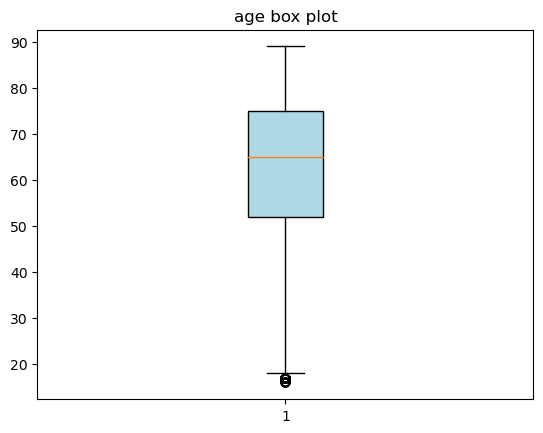

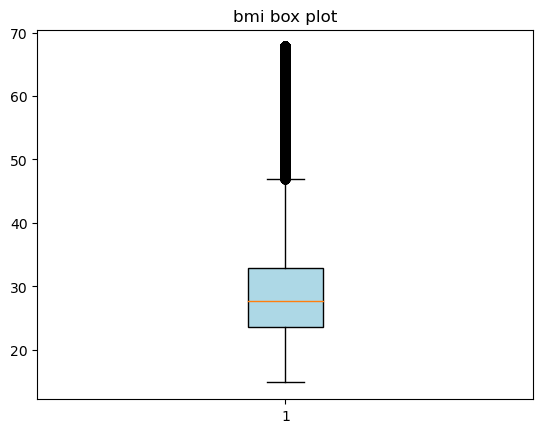

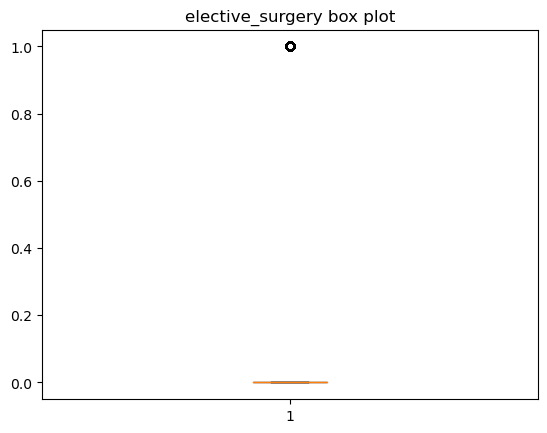

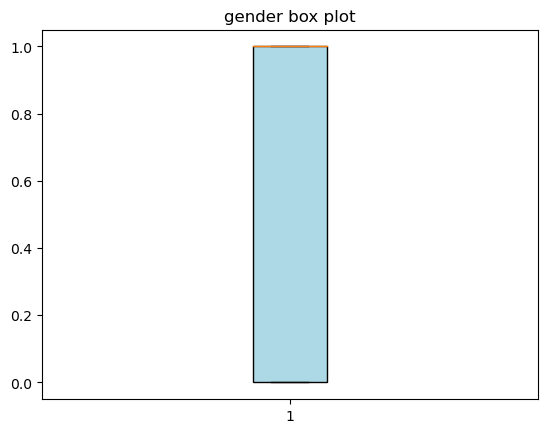

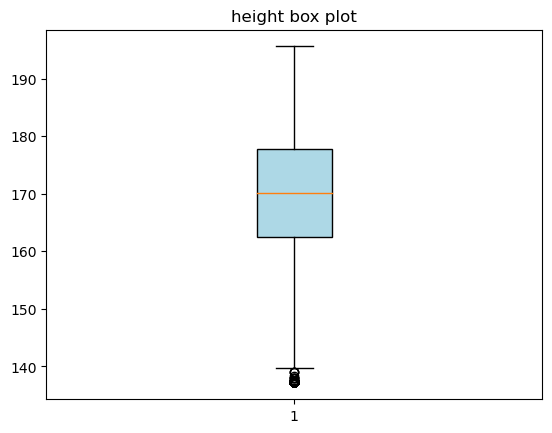

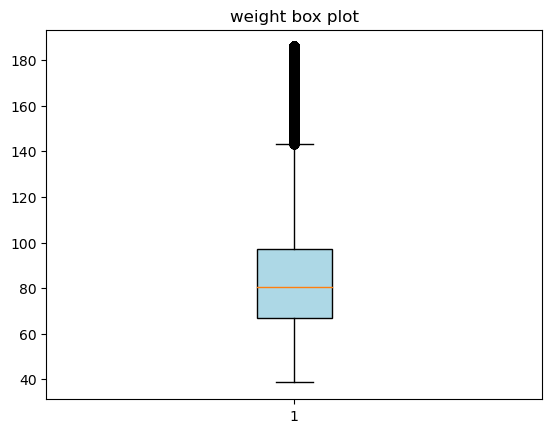

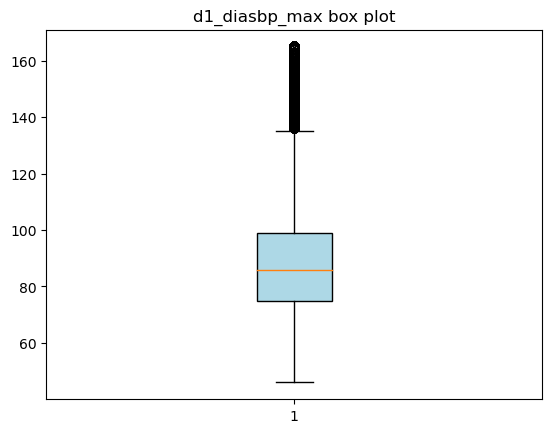

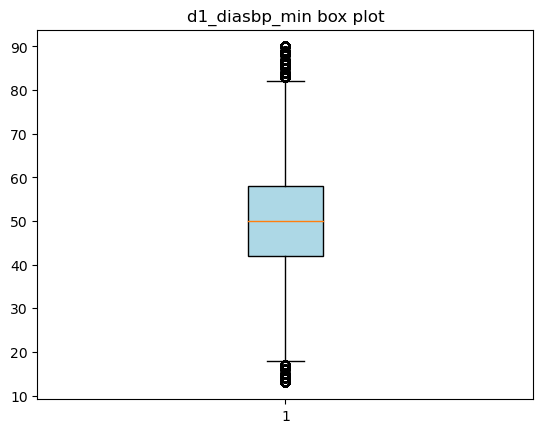

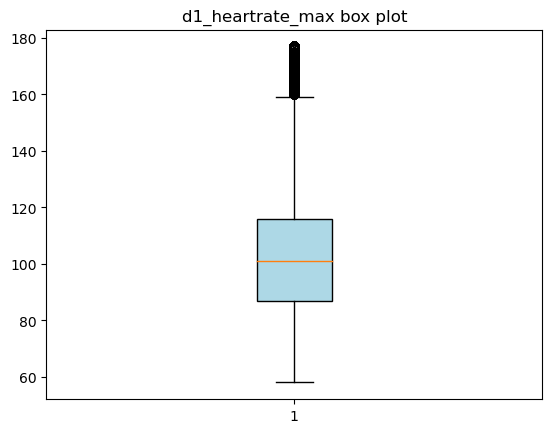

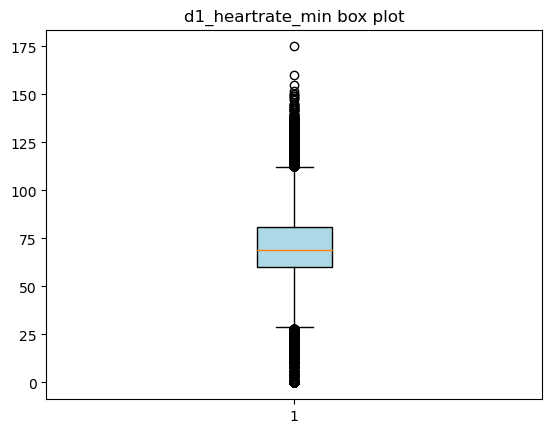

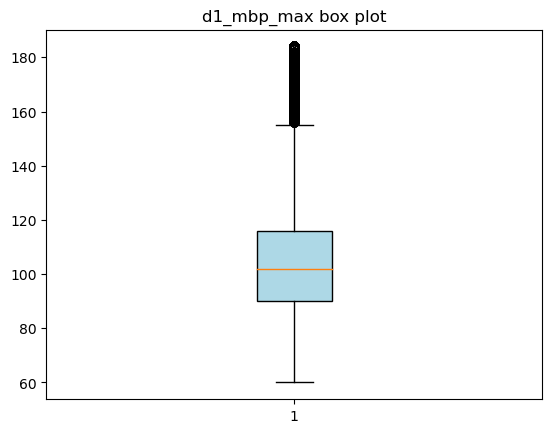

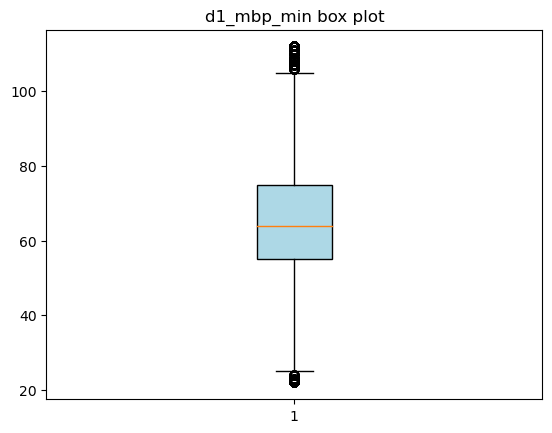

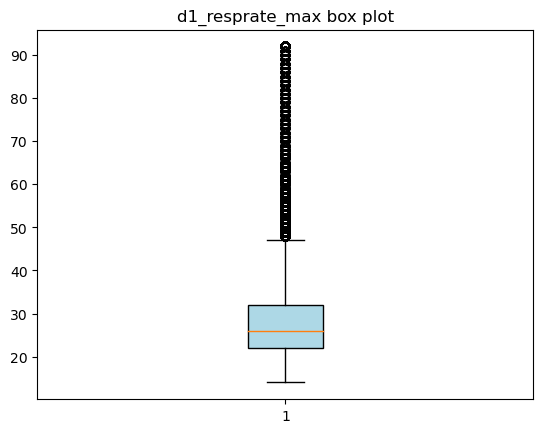

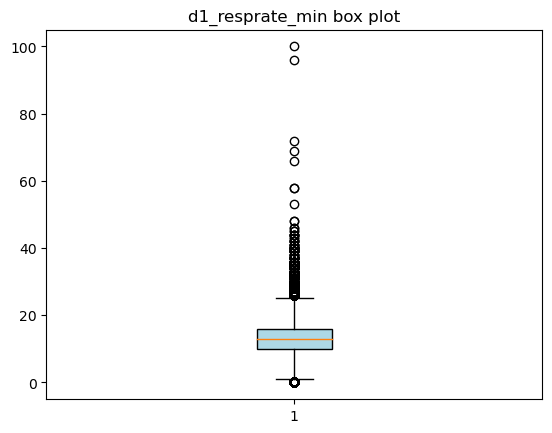

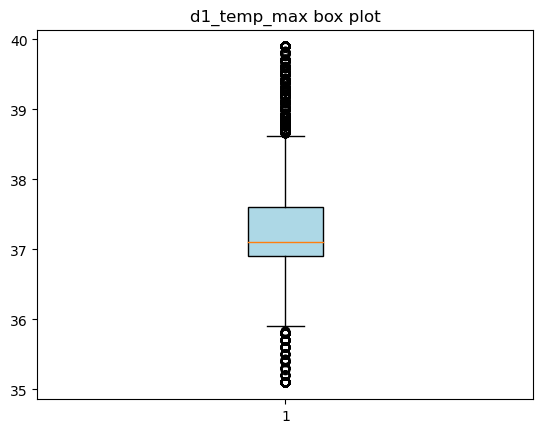

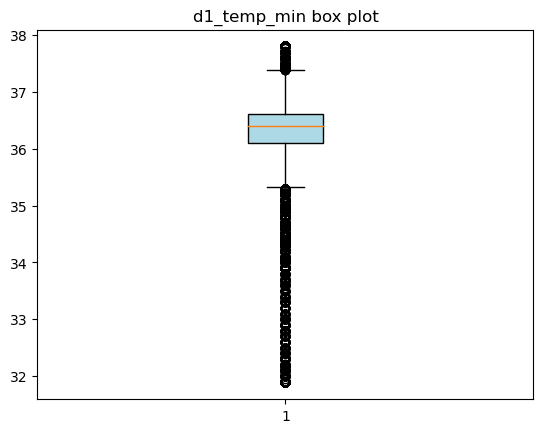

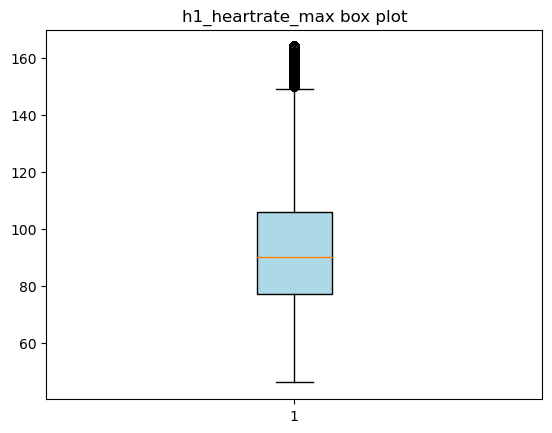

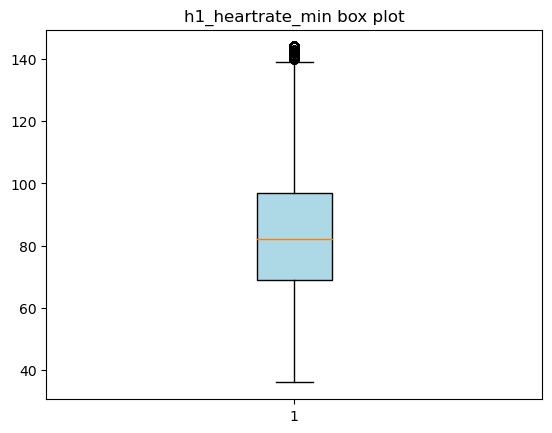

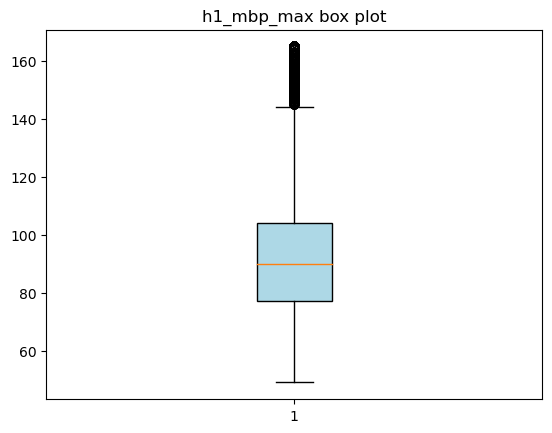

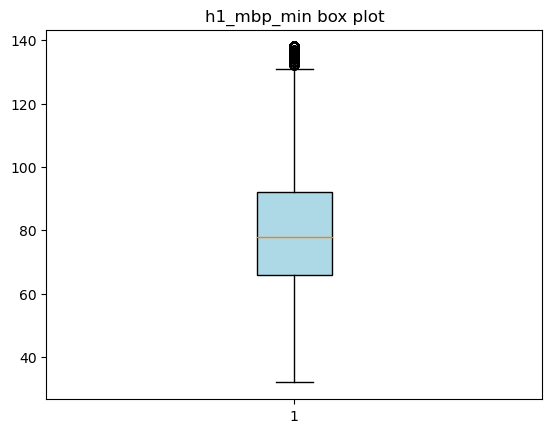

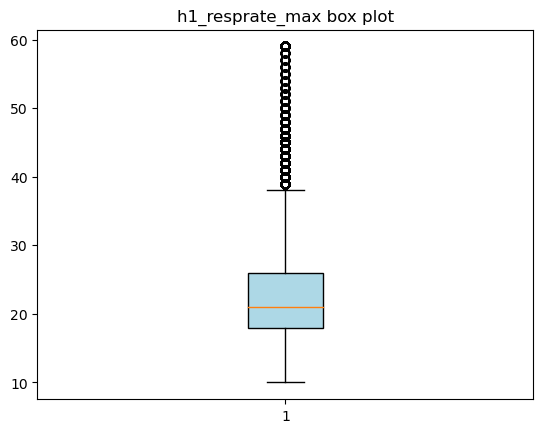

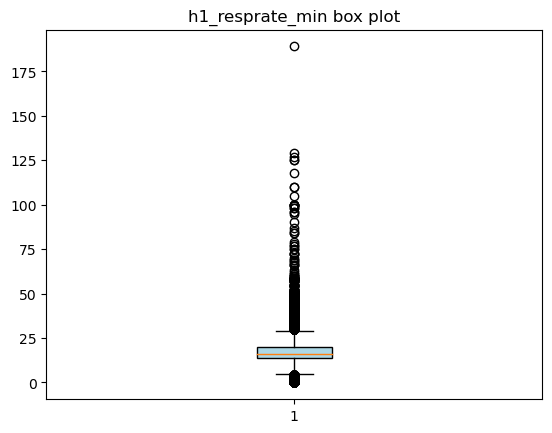

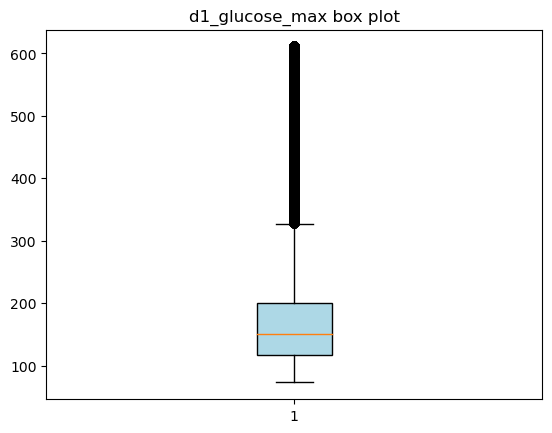

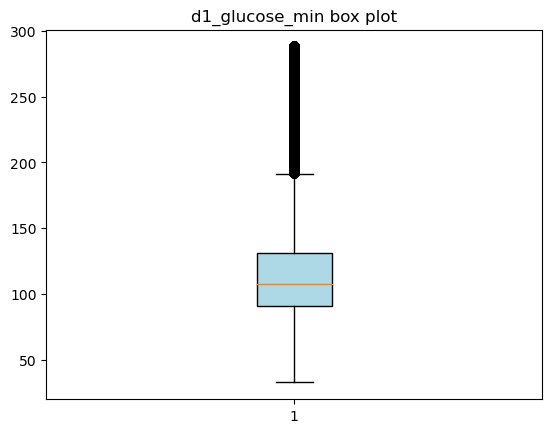

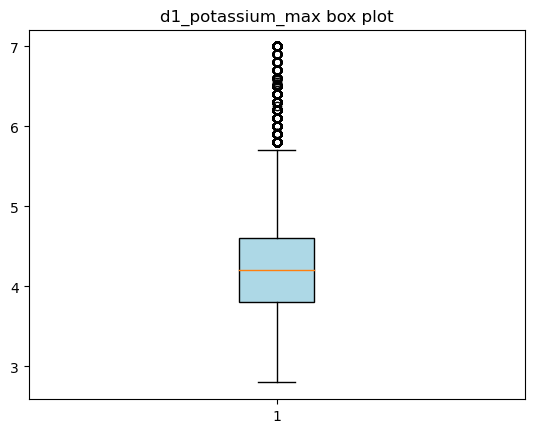

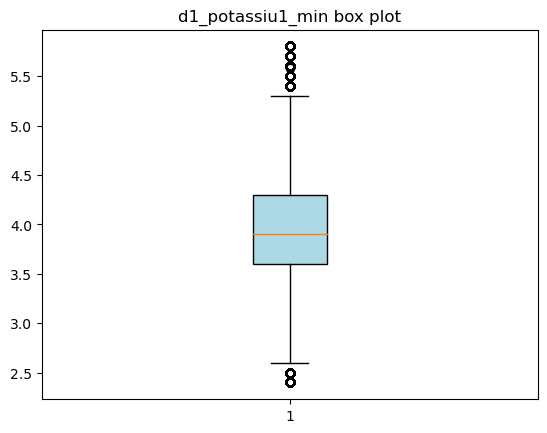

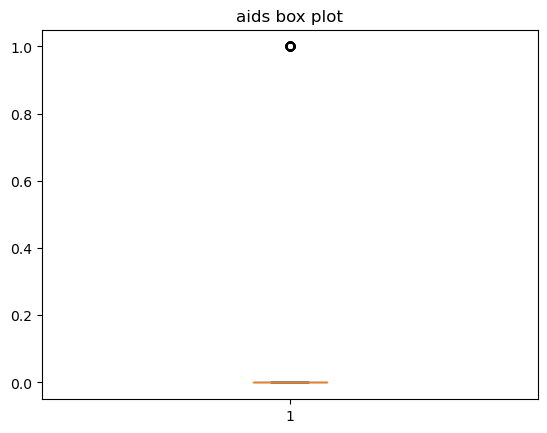

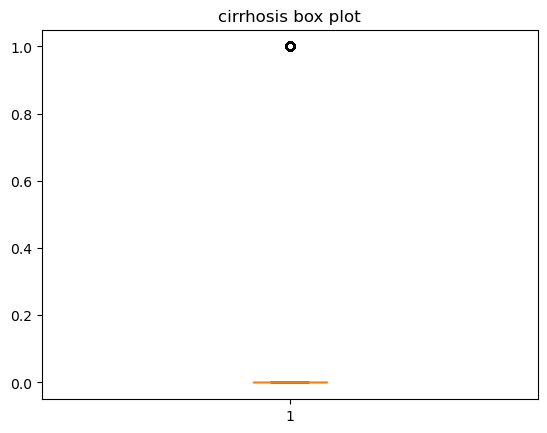

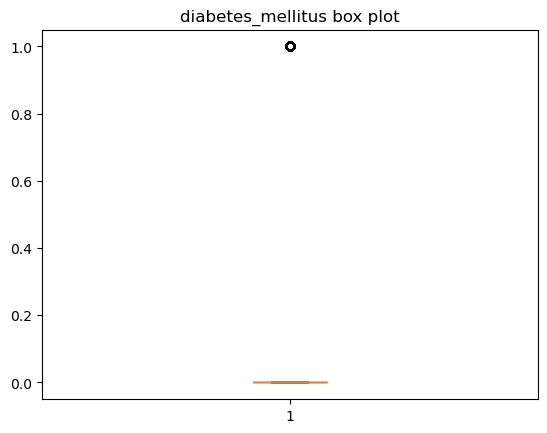

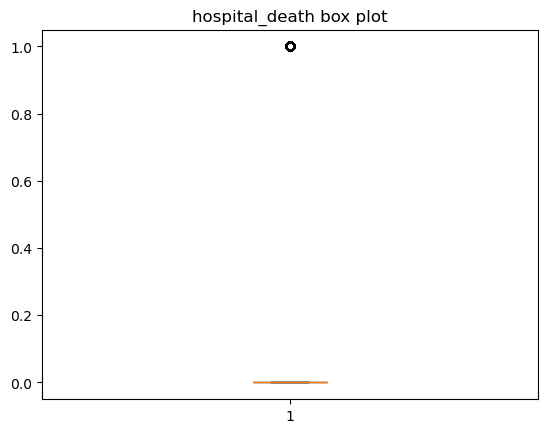

In [ ]:
for col in hospital_data.columns:
    box = plt.boxplot(hospital_data[col], patch_artist=True, boxprops={'facecolor': 'lightblue'})
    plt.title(col + " box plot")
    plt.show()